In [10]:
#pgm1 find s
import csv
hypo = ['%'] * 6
data=[]
print("\nThe given training examples are:")
#Load the dataset
with open(r"C:\Users\Ananya rao\Downloads\p1_dataset.csv") as csv_file:
    readcsv = csv.reader(csv_file, delimiter=',')
    next(readcsv)
    for row in readcsv:
        print(row)
        if(row[-1]=="Yes"):
            data.append(row)
#Display positive examples
print("\nThe positive examples are:")
for x in data:
    print(x)
print("\nThe steps of the Find-s algorithm are\n",hypo)
#Implementing Find-S Algorithm
for i in range(len(data)):
    for j in range(len(data[i])-1):
        if hypo[j] == '%':
            hypo[j] = data[i][j]
        elif hypo[j] != data[i][j]:
                hypo[j] = '?'
    print(hypo)
print("\nThe maximally specific Find-s hypothesis for the given training examples is:")
print([h for h in hypo if h != '%'])


The given training examples are:
['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', 'Yes']
['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'Yes']
['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change', 'No']
['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change', 'Yes']

The positive examples are:
['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', 'Yes']
['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'Yes']
['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change', 'Yes']

The steps of the Find-s algorithm are
 ['%', '%', '%', '%', '%', '%']
['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
['Sunny', 'Warm', '?', 'Strong', '?', '?']

The maximally specific Find-s hypothesis for the given training examples is:
['Sunny', 'Warm', '?', 'Strong', '?', '?']


In [17]:
#pgm2 candidate elimination

import csv

with open(r"C:\Users\Ananya rao\Downloads\p1_dataset.csv") as csv_file:
    readcsv=csv.reader(csv_file)
    data=list(readcsv)
    specific=data[1][:-1]
    general=[['?' for i in range(len(specific))] for j in range(len(specific))]
    
    for i in data:
        if i[-1]=='Yes':
            for j in range(len(specific)):
                if i[j]!=specific[j]:
                    specific[j]='?'
                    general[j][j]='?'
            
        elif i[-1]=='No':
            for j in range(len(specific)):
                if i[j]!=specific[j]:
                    general[j][j]=specific[j]
                else:
                    general[j][j]='?'
        print('the steps '+ str(data.index(i)+1)+'of algorithm are')
        print(general)
        print(specific)

    gh=[]
    for i in general:
        for j in i:
            if j!='?':
                gh.append(i)
                break
    

                            


    print('final general',gh)
    print('final specific',specific)
                

the steps 1of algorithm are
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
the steps 2of algorithm are
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
the steps 3of algorithm are
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
the steps 4of algorithm are
[['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', 

In [27]:
#pgm3 data cleaning
import pandas as pd
#Data Cleaning - Features(Ordinal encoder) and Targets(Label encoder)
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

tennis=pd.read_csv(r"C:\Users\Ananya rao\Downloads\P3_cleaning.csv")
x=tennis.iloc[:,0:4]
y=tennis.iloc[:,4:5]
print('features')
print(x)
print('target')
print(y)

ordinal_encoder = OrdinalEncoder() # for cleaning the features
label_encode = LabelEncoder() # for cleaning the targets


x_ordinalencoder = ordinal_encoder.fit_transform(x)
y_labelencoder=label_encode.fit_transform(y.values.ravel())
print('features',x_ordinalencoder)
print()
print('target',y_labelencoder)

features
     outlook temperature humidity    wind
0      sunny         hot     high    weak
1      sunny         hot     high  strong
2   overcast         hot     high    weak
3       rain        mild     high    weak
4       rain        cool   normal    weak
5       rain        cool   normal  strong
6   overcast        cool   normal  strong
7      sunny        mild     high    weak
8      sunny        cool   normal    weak
9       rain        mild   normal    weak
10     sunny        mild   normal  strong
11  overcast        mild     high  strong
12  overcast         hot   normal    weak
13      rain        mild     high  strong
target
   play
0    no
1    no
2   yes
3   yes
4   yes
5    no
6   yes
7    no
8   yes
9   yes
10  yes
11  yes
12  yes
13   no
features [[2. 1. 0. 1.]
 [2. 1. 0. 0.]
 [0. 1. 0. 1.]
 [1. 2. 0. 1.]
 [1. 0. 1. 1.]
 [1. 0. 1. 0.]
 [0. 0. 1. 0.]
 [2. 2. 0. 1.]
 [2. 0. 1. 1.]
 [1. 2. 1. 1.]
 [2. 2. 1. 0.]
 [0. 2. 0. 0.]
 [0. 1. 1. 1.]
 [1. 2. 0. 0.]]

target [0 0 1

shape(150, 2)(150,)
[[0.         0.90740741 0.09259259]]
['versicolor']


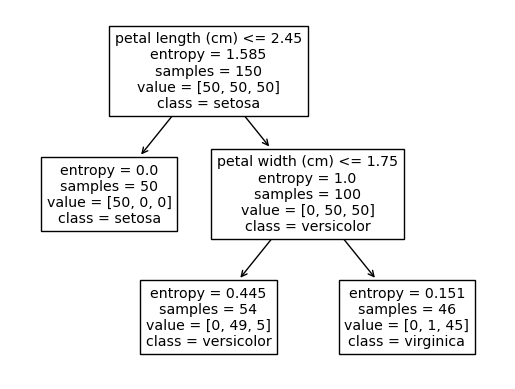

In [31]:
#pgm4 ID3
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

iris_data=load_iris()
x=iris_data.data[:,2:]
y=iris_data.target
print('shape'+str(x.shape)+str(y.shape))

from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=100)
clf=tree_clf.fit(x,y)

from sklearn import tree
tree.plot_tree(clf,feature_names=iris_data.feature_names[2:],class_names=iris_data.target_names)

print(tree_clf.predict_proba([[5,1.5]]))

otp = tree_clf.predict([[5,1.5]])
print(iris_data.target_names[otp])

In [35]:
#pgm5 randomforest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

iris_data=load_iris()
x=iris_data.data[:,2:]
y=iris_data.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
df=pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
df['target']=iris_data.target_names[iris_data.target]
df



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [36]:
rnd_clf=RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1)
rnd_clf.fit(x_train,y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [37]:
y_pred_rf=rnd_clf.predict(x_test)
accuracy_score=accuracy_score(y_test,y_pred_rf)

In [38]:
print('actual:',y_test)
print('predicted:',y_pred_rf)
print('accuracy:',accuracy_score)

actual: [1 2 0 1 1 1 2 2 0 1 1 2 0 2 1 2 2 0 0 0 0 0 0 2 0 0 0 2 2 1]
predicted: [1 2 0 1 1 1 2 2 0 1 1 2 0 2 1 2 2 0 0 0 0 0 0 2 0 0 0 2 2 1]
accuracy: 1.0


In [42]:
#pgm6 naive bayesian
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

dataset=load_breast_cancer()
x=dataset.data
y=dataset.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
gb=GaussianNB()
y_pred = gb.fit(x_train,y_train).predict(x_test)
accu=accuracy_score(y_test,y_pred)
print('actual:',y_test)
print('predicted:',y_pred)
print('accuracy:',accu)

actual: [0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0
 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0
 1 0 1]
predicted: [0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0
 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0
 1 0 1]
accuracy: 0.9298245614035088


In [52]:
#pgm7 bayesianclf
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

dataset=pd.read_csv(r"C:\Users\Ananya rao\Downloads\P7_dataset.csv",names=['message','label'])
dataset['labelnum']=dataset.label.map({'pos':1,'neg':0})
X=dataset.message
y=dataset.labelnum
dataset[['message','label']].head()

,message,label
1,I love this sandwich,pos
2,This is an amazing place,pos
3,I feel very good about these beers,pos
4,This is my best work,pos
5,What an awesome view,pos


In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=100)
from sklearn.feature_extraction.text import CountVectorizer
c_v = CountVectorizer()
X_train_dtm=c_v.fit_transform(X_train)
X_test_dtm=c_v.transform(X_test)
clf=MultinomialNB().fit(X_train_dtm,y_train)
pred=clf.predict(X_test_dtm)

In [58]:
acc=accuracy_score(y_test,pred)
print(acc)
print(confusion_matrix(y_test,pred))
print(precision_score(y_test,pred))


1.0
[[3 0]
 [0 2]]
1.0


In [59]:
#pgm8 heartbayesian
!pip install torch
!pip install pgmpy


     -------------------------------------- 172.4/172.4 MB 5.9 MB/s eta 0:00:00
     ---------------------------------------- 1.9/1.9 MB 1.9 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)


In [1]:
import pandas as pd
import numpy as np
from pgmpy.inference import VariableElimination
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator

heartdisease=pd.read_csv(r"C:\Users\Ananya rao\Downloads\heart.csv")
heartdisease=heartdisease.replace('?',np.nan)
heartdisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [2]:
model=BayesianModel([('age','heartdisease'),('sex','heartdisease'),('exang','heartdisease'),('cp','heartdisease'),('heartdisease','restecg'),('heartdisease','chol')])


C:\anaconda\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [3]:
model.fit(heartdisease,estimator= MaximumLikelihoodEstimator)



In [4]:
heart_inference=VariableElimination(model)



In [5]:
print('the probablity of hear disease when restecg:1')
q1=heart_inference.query(variables=['heartdisease'],evidence={'restecg':1})
print(q1)

the probablity of hear disease when restecg:1
+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.1012 |
+-----------------+---------------------+
| heartdisease(1) |              0.0000 |
+-----------------+---------------------+
| heartdisease(2) |              0.2392 |
+-----------------+---------------------+
| heartdisease(3) |              0.2015 |
+-----------------+---------------------+
| heartdisease(4) |              0.4581 |
+-----------------+---------------------+


C:\anaconda\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [6]:
q2=heart_inference.query(variables=['heartdisease'],evidence={'cp':2})
print(q2)

+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.3610 |
+-----------------+---------------------+
| heartdisease(1) |              0.2159 |
+-----------------+---------------------+
| heartdisease(2) |              0.1373 |
+-----------------+---------------------+
| heartdisease(3) |              0.1537 |
+-----------------+---------------------+
| heartdisease(4) |              0.1321 |
+-----------------+---------------------+


In [11]:
#pgm9 EM
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

x=pd.read_csv(r"C:\Users\Ananya rao\Downloads\P9_dataset.csv")
x1 = x['Distance_Feature'].values
x2 = x['Speeding_Feature'].values
x= np.array(list(zip(x1,x2))).reshape(len(x1),2)



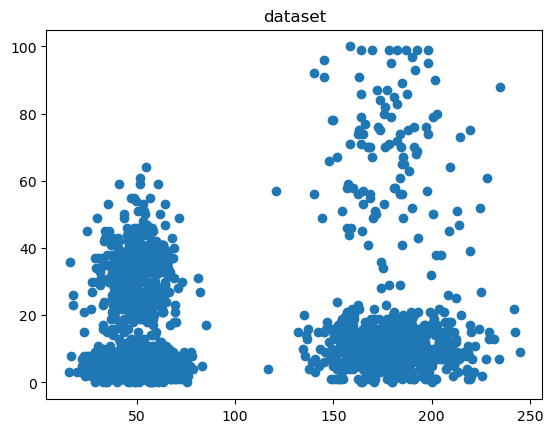

In [13]:
plt.plot()
plt.title('dataset')
plt.scatter(x1,x2)
plt.show()

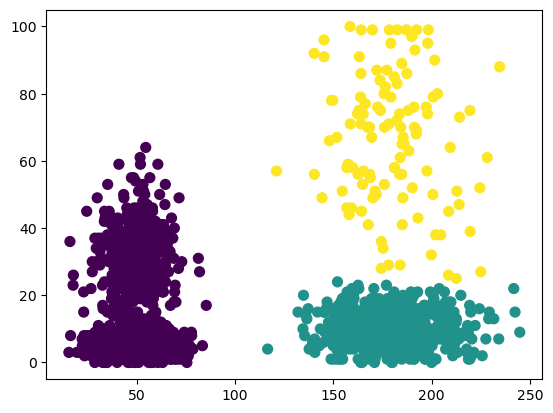

In [14]:
gmm=GaussianMixture(n_components=3)
gmm.fit(x)
pred=gmm.predict(x)
plt.scatter(x[:,0],x[:,1],c=pred,s=50)
plt.show()

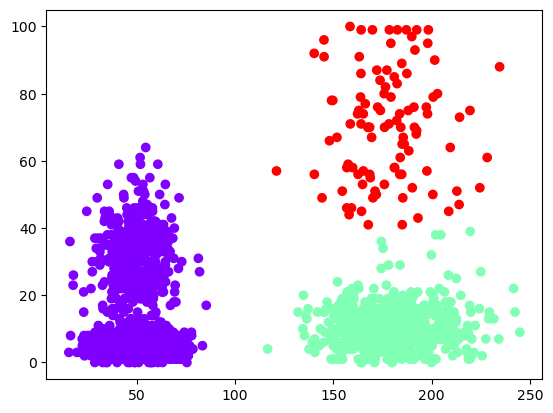

In [21]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(x)
pred=kmeans.fit(x)
plt1.scatter(x[:,0], x[:,1], c=kmeans.labels_, cmap='rainbow') 

plt1.show()

In [24]:
#pgm10 SVM
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
# Load the breast cancer dataset
data = load_breast_cancer()
x = data.data # Features
y = data.target # Target variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

svm=SVC(kernel='linear')

a=svm.fit(x_train,y_train)

b=a.predict(x_test)

print("Predicted : ",b)
print("Confusion Matrix \n",confusion_matrix(y_test,b))
print("Accuracy:",accuracy_score(y_test,b))

Predicted :  [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0]
Confusion Matrix 
 [[39  4]
 [ 1 70]]
Accuracy: 0.956140350877193
